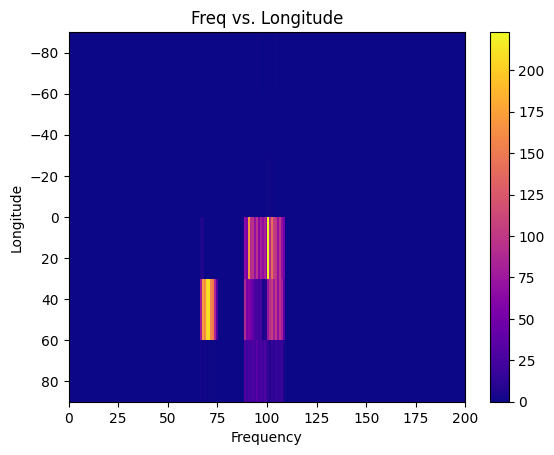

In [45]:
#Input coordinates and radius return waterfall of freq vs. position
from geopy.distance import geodesic
import pandas as pd
import numpy as np

dx = pd.read_csv("/Users/jakobperivolotis/Desktop/dataFM/resultsWorld/worldDataCoverage.csv")
x = dx.iloc[:, [2, 3]]
dy = dx.iloc[:, [0, 2, 3]]

def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).km

def filter_coords(origin, coords, radius):
    my_list = []
    for coordinate in coords:
        distance = calculate_distance(origin, coordinate)
        if distance < radius:
            my_list.append(coordinate)
    return my_list

def round_and_count(data, num_bins=200):
    rounded_values = np.round(data).astype(int)
    counts = np.bincount(rounded_values, minlength=num_bins)
    return counts.tolist()

if __name__ == "__main__":
    origins = [(90, 90), (50, 90), (10, 90), (-30, 90), (-70, 90), (-90, 90)]  
    coords = list(x.itertuples(index=False, name=None))
    radius = 2300
    results = []
    for origin in origins:
        my_list = filter_coords(origin, coords, radius)
        valid_results = [val for val in dy[dy[["Lat", "long"]].apply(tuple, axis=1).isin(my_list)].dropna()["freq"]]
        counts = round_and_count(valid_results)
        results.append(counts)

#print(results)

p = results

plt.imshow(p, cmap = "plasma", origin = "lower", interpolation = "none", extent = [0, 200, 90, -90], aspect = "auto")
plt.colorbar()
plt.title("Freq vs. Latitude")
plt.xlabel("Frequency")
plt.ylabel("Latitude")
plt.show()
